In [91]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [92]:
df = pd.read_csv("../ChurnPred/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [93]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [94]:
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    print("\nData types:")
    print(df.dtypes)
    
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Data types:
cu

In [95]:
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ''


In [96]:
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [97]:
drop_index=df[df['TotalCharges']==' '].index
df= df.drop(index=drop_index)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [98]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


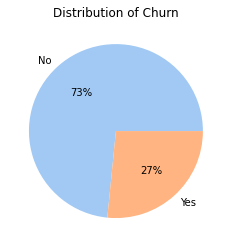

In [99]:
chart_i = df["Churn"].value_counts().to_frame()
chart_i = chart_i.reset_index()
chart_i = chart_i.rename(columns={'index': 'Category'})
palette_color = sns.color_palette('pastel')
  

plt.pie(chart_i['Churn'], labels=chart_i['Category'], colors=palette_color,autopct='%.0f%%')
plt.title('Distribution of Churn')
plt.show()

In [100]:
def plot_bar(feature, df= df):
    titles="Churn Rate By {}".format(feature)
    plt.title(titles)
    sns.countplot(x=feature,data=df, hue='Churn',palette='viridis')
    


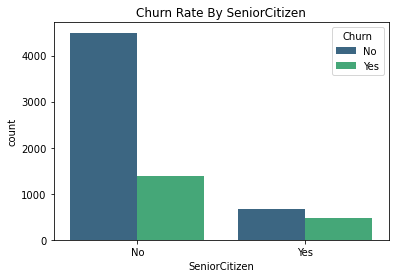

In [101]:
df.loc[df.SeniorCitizen==0,'SeniorCitizen'] = "No"   
df.loc[df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"
plot_bar('SeniorCitizen')

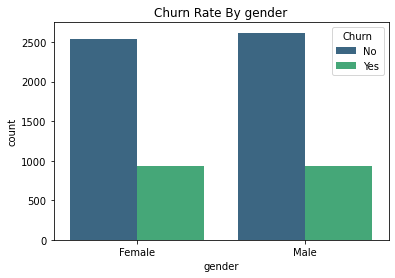

In [102]:
plot_bar('gender')



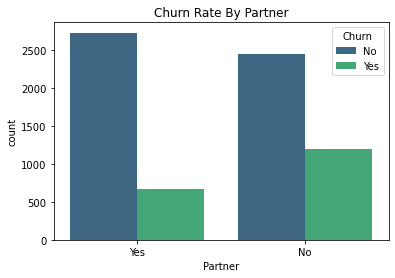

In [103]:
plot_bar('Partner')

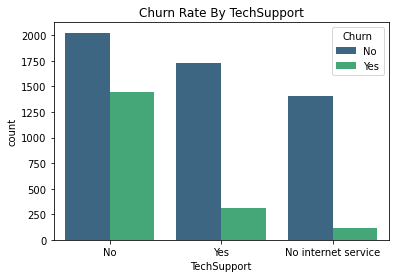

In [104]:
plot_bar('TechSupport')

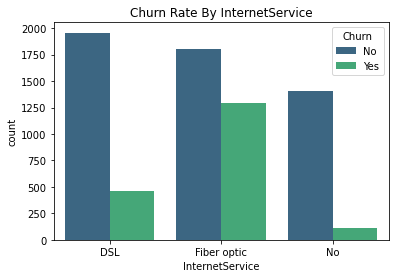

In [105]:
plot_bar('InternetService')

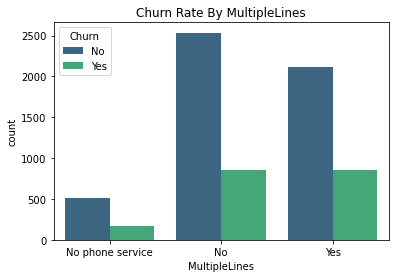

In [106]:
plot_bar('MultipleLines')

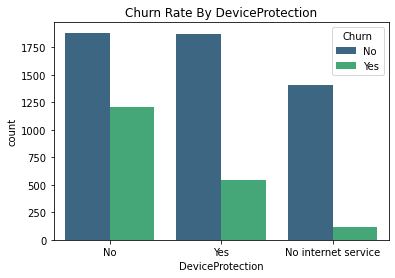

In [107]:
plot_bar('DeviceProtection')

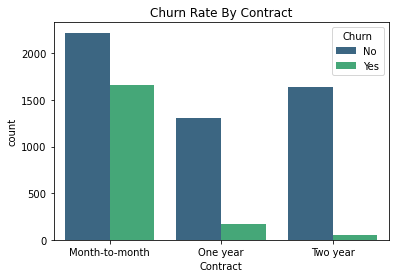

In [108]:
plot_bar('Contract')

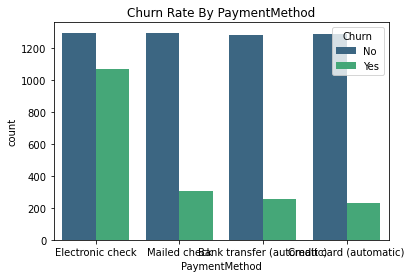

In [109]:
plot_bar('PaymentMethod')

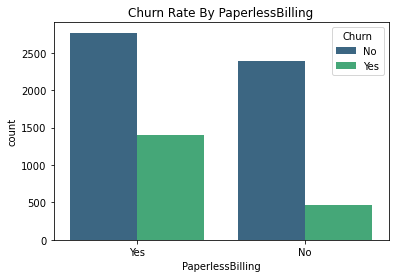

In [110]:
plot_bar('PaperlessBilling')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

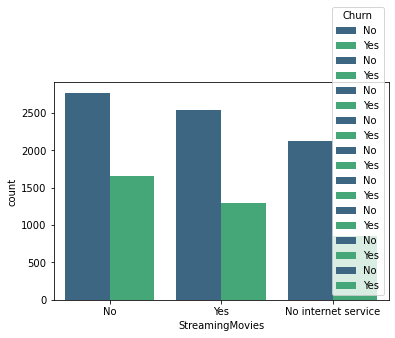

In [111]:
sns.countplot(x='MultipleLines',data=df, hue='Churn',palette='viridis')
sns.countplot(x='InternetService',data=df, hue='Churn',palette='viridis')
sns.countplot(x='DeviceProtection',data=df, hue='Churn',palette='viridis')
sns.countplot(x='TechSupport',data=df, hue='Churn',palette='viridis')
sns.countplot(x='Contract',data=df, hue='Churn',palette='viridis')
sns.countplot(x='PaymentMethod',data=df, hue='Churn',palette='viridis')
sns.countplot(x='PaperlessBilling',data=df, hue='Churn',palette='viridis')
sns.countplot(x='StreamingTV',data=df, hue='Churn',palette='viridis')
sns.countplot(x='StreamingMovies',data=df, hue='Churn',palette='viridis')

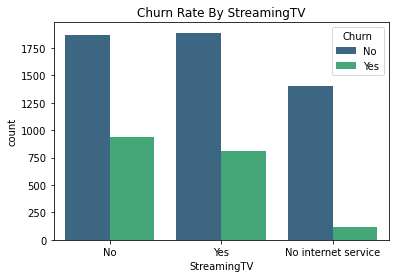

In [112]:
plot_bar('StreamingTV')

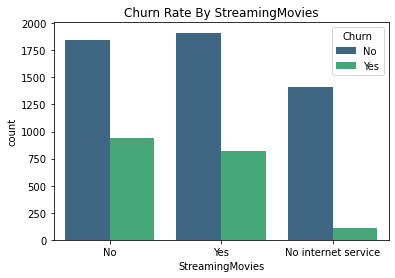

In [113]:
plot_bar('StreamingMovies')

In [114]:
def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = df.rename(columns={0: 'Count'})
    title=f'Churn rate frequency to {feature} distribution'
    plt.title(title)
    sns.histplot(x = feature, hue = 'Churn', data = group_df, multiple='dodge')
    
    

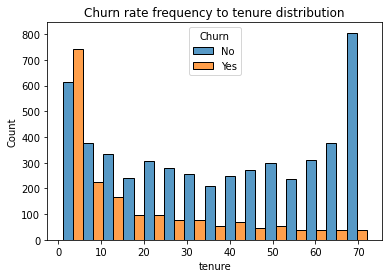

In [115]:
hist('tenure')

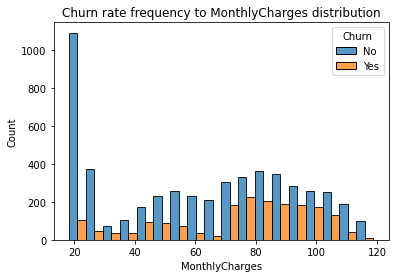

In [116]:
hist('MonthlyCharges')

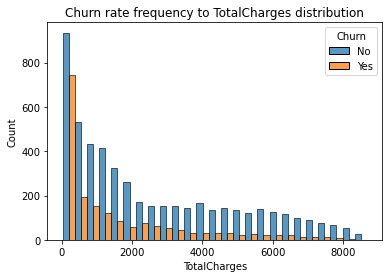

In [117]:
hist('TotalCharges')

In [118]:
def binary_map(feature):
    return feature.map({'Yes':1, 'No':0})

In [119]:
df.drop(["customerID"],axis=1,inplace = True)


In [120]:
df['Churn'] = df[['Churn']].apply(binary_map)

df['gender'] = df['gender'].map({'Male':1, 'Female':0})


binary_list = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_list] = df[binary_list].apply(binary_map)

In [121]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [122]:
df = pd.get_dummies(df, drop_first=True)

In [123]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [124]:
df.dtypes

gender                                     int64
SeniorCitizen                              int64
Partner                                    int64
Dependents                                 int64
tenure                                     int64
PhoneService                               int64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No inter

In [125]:
y = df['Churn']

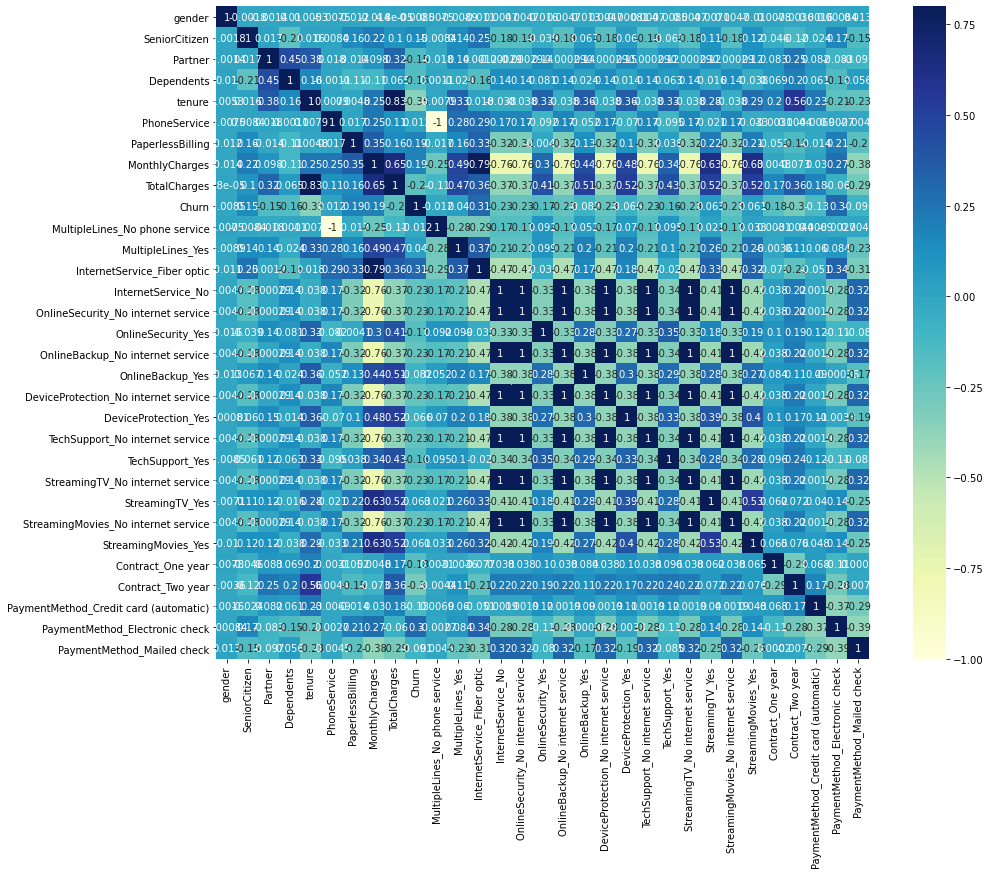

In [126]:
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

In [127]:
columns = ['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'MultipleLines_No_phone_service', 'MultipleLines_Yes', 'InternetService_Fiber_optic', 'InternetService_No', 'OnlineSecurity_No_internet_service', 'OnlineSecurity_Yes', 'OnlineBackup_No_internet_service', 'TechSupport_No_internet_service', 'TechSupport_Yes', 'StreamingTV_No_internet_service', 'StreamingTV_Yes', 'StreamingMovies_No_internet_service', 'StreamingMovies_Yes', 'Contract_One_year', 'Contract_Two_year', 'PaymentMethod_Electronic_check']
        #Encoding the other categorical categoric features with more than two categories
df_final = pd.get_dummies(df).reindex(columns=columns, fill_value=0)

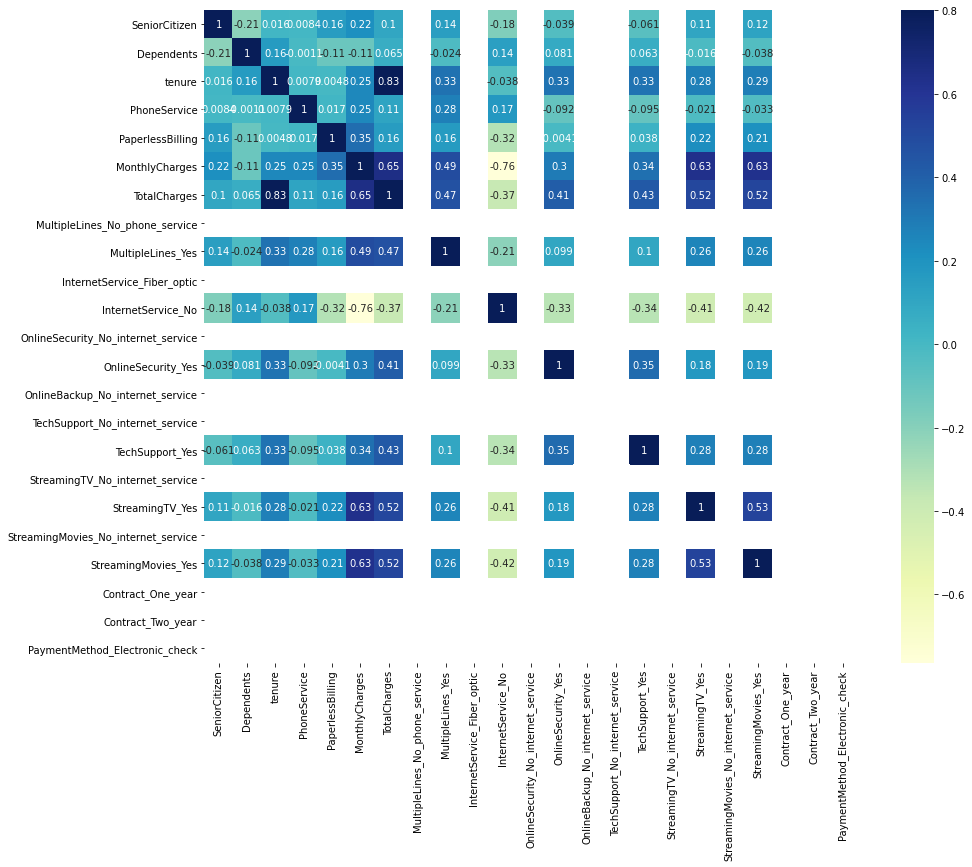

In [128]:

corr = df_final.corr()

f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corr, annot=True, vmax=.8, square=True,cmap = 'YlGnBu');

In [129]:

X_df = df_final.loc[:, df_final.columns != 'Churn']

In [130]:
from sklearn.preprocessing import MinMaxScaler
features = X_df.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_df)
X = pd.DataFrame(scaler.transform(X_df))
X.columns = features
X.head()

,SeniorCitizen,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No_phone_service,MultipleLines_Yes,InternetService_Fiber_optic,...,OnlineBackup_No_internet_service,TechSupport_No_internet_service,TechSupport_Yes,StreamingTV_No_internet_service,StreamingTV_Yes,StreamingMovies_No_internet_service,StreamingMovies_Yes,Contract_One_year,Contract_Two_year,PaymentMethod_Electronic_check
0,0.0,0.0,0.000000,0.0,1.0,0.115423,0.001275,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.464789,1.0,0.0,0.385075,0.215867,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.014085,1.0,1.0,0.354229,0.010310,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.619718,0.0,0.0,0.239303,0.210241,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.014085,1.0,1.0,0.521891,0.015330,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [132]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

In [133]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, balanced_accuracy_score, classification_report

In [154]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

In [155]:
def modelEvaluation(model,y_test, y_pred,cols=None):
    print("Accurancy: {:.3f}".format(accuracy_score(y_test, y_pred)))
    print("ROC AUC Score: {:.3f}".format(roc_auc_score(y_test, y_pred)))
    print("F1 Score:: {:.3f} ".format(f1_score(y_test, y_pred)))
    print("Balanced Accurancy Score:: {:.3f} ".format(balanced_accuracy_score(y_test, y_pred)))
    print('\n clasification report:\n', classification_report(y_test,y_pred))
    print(confusion_matrix(y_test, y_pred))

In [157]:
LR  = LogisticRegression()
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)
modelEvaluation(LR, y_test, y_predict, X_train.columns)

Accurancy: 0.793
ROC AUC Score: 0.697
F1 Score:: 0.559 
Balanced Accurancy Score:: 0.697 

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1549
           1       0.65      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

[[1398  151]
 [ 285  276]]


In [137]:
classifier  = SVC()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
modelEvaluation(classifier, y_test, y_predict, X_train.columns)

Accurancy: 0.798
ROC AUC Score: 0.693
F1 Score:: 0.553 
Balanced Accurancy Score:: 0.693 

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1549
           1       0.67      0.47      0.55       561

    accuracy                           0.80      2110
   macro avg       0.75      0.69      0.71      2110
weighted avg       0.79      0.80      0.79      2110

[[1419  130]
 [ 297  264]]


In [138]:
classifier  = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
modelEvaluation(classifier, y_test, y_predict, X_train.columns)

Accurancy: 0.772
ROC AUC Score: 0.674
F1 Score:: 0.521 
Balanced Accurancy Score:: 0.674 

 clasification report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.59      0.47      0.52       561

    accuracy                           0.77      2110
   macro avg       0.70      0.67      0.69      2110
weighted avg       0.76      0.77      0.76      2110

[[1366  183]
 [ 299  262]]


In [139]:
classifier  = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
modelEvaluation(classifier, y_test, y_predict, X_train.columns)

Accurancy: 0.723
ROC AUC Score: 0.645
F1 Score:: 0.478 
Balanced Accurancy Score:: 0.645 

 clasification report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81      1549
           1       0.48      0.48      0.48       561

    accuracy                           0.72      2110
   macro avg       0.64      0.64      0.64      2110
weighted avg       0.72      0.72      0.72      2110

[[1257  292]
 [ 293  268]]


In [140]:
classifier  = XGBClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
modelEvaluation(classifier, y_test, y_predict, X_train.columns)

C:\Users\USER\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:28:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accurancy: 0.777
ROC AUC Score: 0.688
F1 Score:: 0.543 
Balanced Accurancy Score:: 0.688 

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.50      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

[[1361  188]
 [ 282  279]]


In [148]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
log = LogisticRegression()
rfecv = RFECV(estimator=log, cv=StratifiedKFold(10, random_state=50, shuffle=True), scoring="accuracy")
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=50, shuffle=True),
      estimator=LogisticRegression(), scoring='accuracy')

In [149]:
X_rfe = X.iloc[:, rfecv.support_]

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.3, random_state=42)

In [152]:
Lrc  = LogisticRegression()
Lrc.fit(X_train, y_train)
y_predict = Lrc.predict(X_test)
modelEvaluation(Lrc, y_test, y_predict, X_train.columns)

Accurancy: 0.792
ROC AUC Score: 0.697
F1 Score:: 0.558 
Balanced Accurancy Score:: 0.697 

 clasification report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.64      0.49      0.56       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110

[[1396  153]
 [ 285  276]]


In [158]:
#saving the model to file
import pickle
filename = 'model.sav'
pickle.dump(LR, open(filename, 'wb'))